### 웹에서 비스 이미지를 다운받은 후
### 객체탐지 및 추적 수행

/Users/being/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(

100%|██████████| 134k/134k [00:00<00:00, 32.6MB/s]
image 1/1 /Users/being/Desktop/workspace2024/PALCON/src/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 97.6ms
Speed: 6.1ms preprocess, 97.6ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 480)


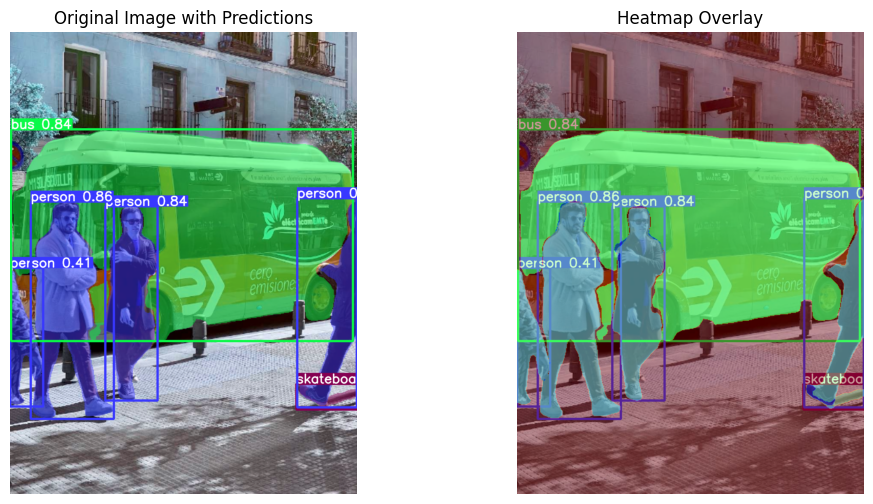

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load a model
model = YOLO("yolov8n-seg.pt")  # load an official model

# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

# Get the image with predictions
img = results[0].plot()

# Create a heatmap
heatmap = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)

# Overlay the prediction masks onto the heatmap
if results[0].masks is not None:
    for mask in results[0].masks.data:
        mask = mask.cpu().numpy().squeeze()  # Convert mask to numpy array and remove single-dimensional entries
        mask_resized = cv2.resize(mask, (heatmap.shape[1], heatmap.shape[0]))  # Resize mask to match heatmap size
        heatmap = cv2.add(heatmap, mask_resized.astype(np.float32))

# Normalize the heatmap
heatmap = cv2.normalize(heatmap, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Convert heatmap to RGB
heatmap_img = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Combine the original image with the heatmap
overlay_img = cv2.addWeighted(img, 0.6, heatmap_img, 0.4, 0)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image with Predictions')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Heatmap Overlay')
plt.imshow(overlay_img)
plt.axis('off')

plt.show()